# **TASK-1 CycleGAN**

### *Name* : Pranav Sunil Raja

### *Student ID* : 240408544

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset folder in Google Drive
dataset_dir = "/content/drive/MyDrive/CycleGAN_Dataset"

# Define subfolders
folders = ["trainA", "testA", "trainB", "testB"]
for folder in folders:
    os.makedirs(os.path.join(dataset_dir, folder), exist_ok=True)

print(f"Created data folder in {dataset_dir}")


Mounted at /content/drive
Created data folder in /content/drive/MyDrive/CycleGAN_Dataset


In [ ]:
import zipfile

# Define main ZIP file paths in Google Drive
main_zip_files = {
    "face_img": "/content/drive/MyDrive/face_img.zip",
    "cat_and_dog": "/content/drive/MyDrive/cat_and_dog-1.zip"
}

# Extract main ZIP files into a temporary location
extract_path = "/content/temp_extracted"
os.makedirs(extract_path, exist_ok=True)

for category, zip_path in main_zip_files.items():
    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Extracted: {zip_path}")
        except zipfile.BadZipFile:
            print(f"Corrupt zip file: {zip_path}")
    else:
        print(f"File not found: {zip_path}")


Extracted: /content/drive/MyDrive/face_img.zip
Extracted: /content/drive/MyDrive/cat_and_dog-1.zip


In [ ]:
# Define inner ZIP file paths in the extracted directory
inner_zip_files = [
    os.path.join(extract_path, "face_align_celeba.zip"),
    os.path.join(extract_path, "UTK Face Cropped.zip"),
    os.path.join(extract_path, "cat_face.zip"),
    os.path.join(extract_path, "dog faces.zip")
]

# Extract inner ZIP files
for zip_path in inner_zip_files:
    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Extracted: {zip_path}")
        except zipfile.BadZipFile:
            print(f"Corrupt zip file: {zip_path}")
    else:
        print(f"File not found: {zip_path}")


Extracted: /content/temp_extracted/face_align_celeba.zip
Extracted: /content/temp_extracted/UTK Face Cropped.zip
Extracted: /content/temp_extracted/cat_face.zip
Extracted: /content/temp_extracted/dog faces.zip


In [ ]:
import glob
import random
import shutil

# Move function with renaming
def move_images(src_folders, dest_folder, prefix, max_files=1000):
    total_moved = 0
    os.makedirs(dest_folder, exist_ok=True)

    for src_folder in src_folders:
        if os.path.exists(src_folder):
            images = glob.glob(os.path.join(src_folder, "**", "*.*"), recursive=True)[:max_files]
            random.shuffle(images)  # Shuffle for randomness
            for idx, img_path in enumerate(images):
                if img_path.lower().endswith((".jpg", ".png", ".jpeg")):
                    new_filename = f"{prefix}_{idx:05d}" + os.path.splitext(img_path)[-1]
                    dest_path = os.path.join(dest_folder, new_filename)
                    shutil.copy(img_path, dest_path)  # Copy instead of move
            total_moved += len(images)
            print(f"Moved {len(images)} images from {src_folder} to {dest_folder}")
    print(f"Total images moved to {dest_folder}: {total_moved}")

# Paths to final dataset folders
trainA_dir = os.path.join(dataset_dir, "trainA")
trainB_dir = os.path.join(dataset_dir, "trainB")

# Define source folders inside extracted data
source_human_folders = [os.path.join(extract_path, "img_align_celeba"), os.path.join(extract_path, "utkcropped")]
source_animal_folders = [os.path.join(extract_path, "train"),  # Dog dataset
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part1"),
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part2"),
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part3")]

# Move humans to trainA
move_images(source_human_folders, trainA_dir, prefix="human", max_files=10000)

# Move animals to trainB (Dogs & Cats)
move_images(source_animal_folders, trainB_dir, prefix="animal", max_files=10000)


Moved 10000 images from /content/temp_extracted/img_align_celeba to /content/drive/MyDrive/CycleGAN_Dataset/trainA
Moved 10000 images from /content/temp_extracted/utkcropped to /content/drive/MyDrive/CycleGAN_Dataset/trainA
Total images moved to /content/drive/MyDrive/CycleGAN_Dataset/trainA: 20000
Moved 10000 images from /content/temp_extracted/train to /content/drive/MyDrive/CycleGAN_Dataset/trainB
Moved 10000 images from /content/temp_extracted/Cat-faces-dataset-master/dataset-part1 to /content/drive/MyDrive/CycleGAN_Dataset/trainB
Moved 10000 images from /content/temp_extracted/Cat-faces-dataset-master/dataset-part2 to /content/drive/MyDrive/CycleGAN_Dataset/trainB
Moved 9843 images from /content/temp_extracted/Cat-faces-dataset-master/dataset-part3 to /content/drive/MyDrive/CycleGAN_Dataset/trainB
Total images moved to /content/drive/MyDrive/CycleGAN_Dataset/trainB: 39843


In [ ]:
# Define test folders
testA_dir = os.path.join(dataset_dir, "testA")
testB_dir = os.path.join(dataset_dir, "testB")
os.makedirs(testA_dir, exist_ok=True)
os.makedirs(testB_dir, exist_ok=True)

# Get image lists
trainA_images = glob.glob(os.path.join(trainA_dir, "*.*"))
trainB_images = glob.glob(os.path.join(trainB_dir, "*.*"))

# Shuffle before splitting
random.shuffle(trainA_images)
random.shuffle(trainB_images)

# Define split (80% Train, 20% Test)
split_ratio = 0.2
testA_count = int(len(trainA_images) * split_ratio)
testB_count = int(len(trainB_images) * split_ratio)

# Move images to test sets
for img in trainA_images[:testA_count]:
    shutil.move(img, testA_dir)

for img in trainB_images[:testB_count]:
    shutil.move(img, testB_dir)

# Final dataset count
print(f"Dataset Distribution:")
print(f"TrainA (Humans): {len(glob.glob(os.path.join(trainA_dir, '*.*')))} images")
print(f"TestA (Humans): {len(glob.glob(os.path.join(testA_dir, '*.*')))} images")
print(f"TrainB (Animals): {len(glob.glob(os.path.join(trainB_dir, '*.*')))} images")
print(f"TestB (Animals): {len(glob.glob(os.path.join(testB_dir, '*.*')))} images")
print("Dataset is now correctly split")


Dataset Distribution:
TrainA (Humans): 8000 images
TestA (Humans): 2000 images
TrainB (Animals): 16000 images
TestB (Animals): 4000 images
Dataset is now correctly split


In [ ]:
# Clone the CycleGAN repository
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 10.85 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.0 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 s

In [ ]:
# Define checkpoint folder
checkpoint_dir = "/content/drive/MyDrive/CycleGAN_Checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# **Trainning the model**

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 20 \
  --n_epochs_decay 15 \
  --lr 0.0001 \
  --lambda_A 10 --lambda_B 10 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --epoch_count 1 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
            

### *NOTE :* Training was struck so, paused it and trained again from where it was struck (epoch 5)

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 8 \
  --n_epochs 20 \
  --n_epochs_decay 15 \
  --lr 0.00005 \
  --lambda_A 5 --lambda_B 5 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --epoch_count 5 \ # epoch from where it should start
  --continue_train \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

### **Testing after epoch 10**

In [ ]:
!python test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

### **Training again from epoch 10**

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 8 \
  --n_epochs 20 \
  --n_epochs_decay 15 \
  --lr 0.00005 \
  --lambda_A 5 --lambda_B 5 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --epoch_count 10 \
  --continue_train \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

### **Testing after epoch 13**

In [ ]:
!python test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

### **Plotting different types of images present in results directory after testing**

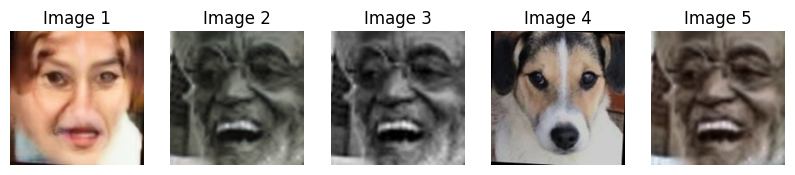

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Define the path to the results directory
results_dir = "/content/drive/MyDrive/CycleGAN_results/human2animal/test_latest/images"

# Get list of generated images
image_files = sorted([f for f in os.listdir(results_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Display some results
num_images = min(5, len(image_files))  # Show up to 5 images
plt.figure(figsize=(10, 10))

for i in range(num_images):
    img_path = os.path.join(results_dir, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.show()


In [ ]:
!python test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results"


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

## **Training from epoch 14**

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 8 \
  --n_epochs 20 \
  --n_epochs_decay 15 \
  --lr 0.00005 \
  --lambda_A 5 --lambda_B 5 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --epoch_count 14 \
  --continue_train \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097


----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

### **Testing**

In [ ]:
!python test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

### **Plotting the original and animal converted test images**

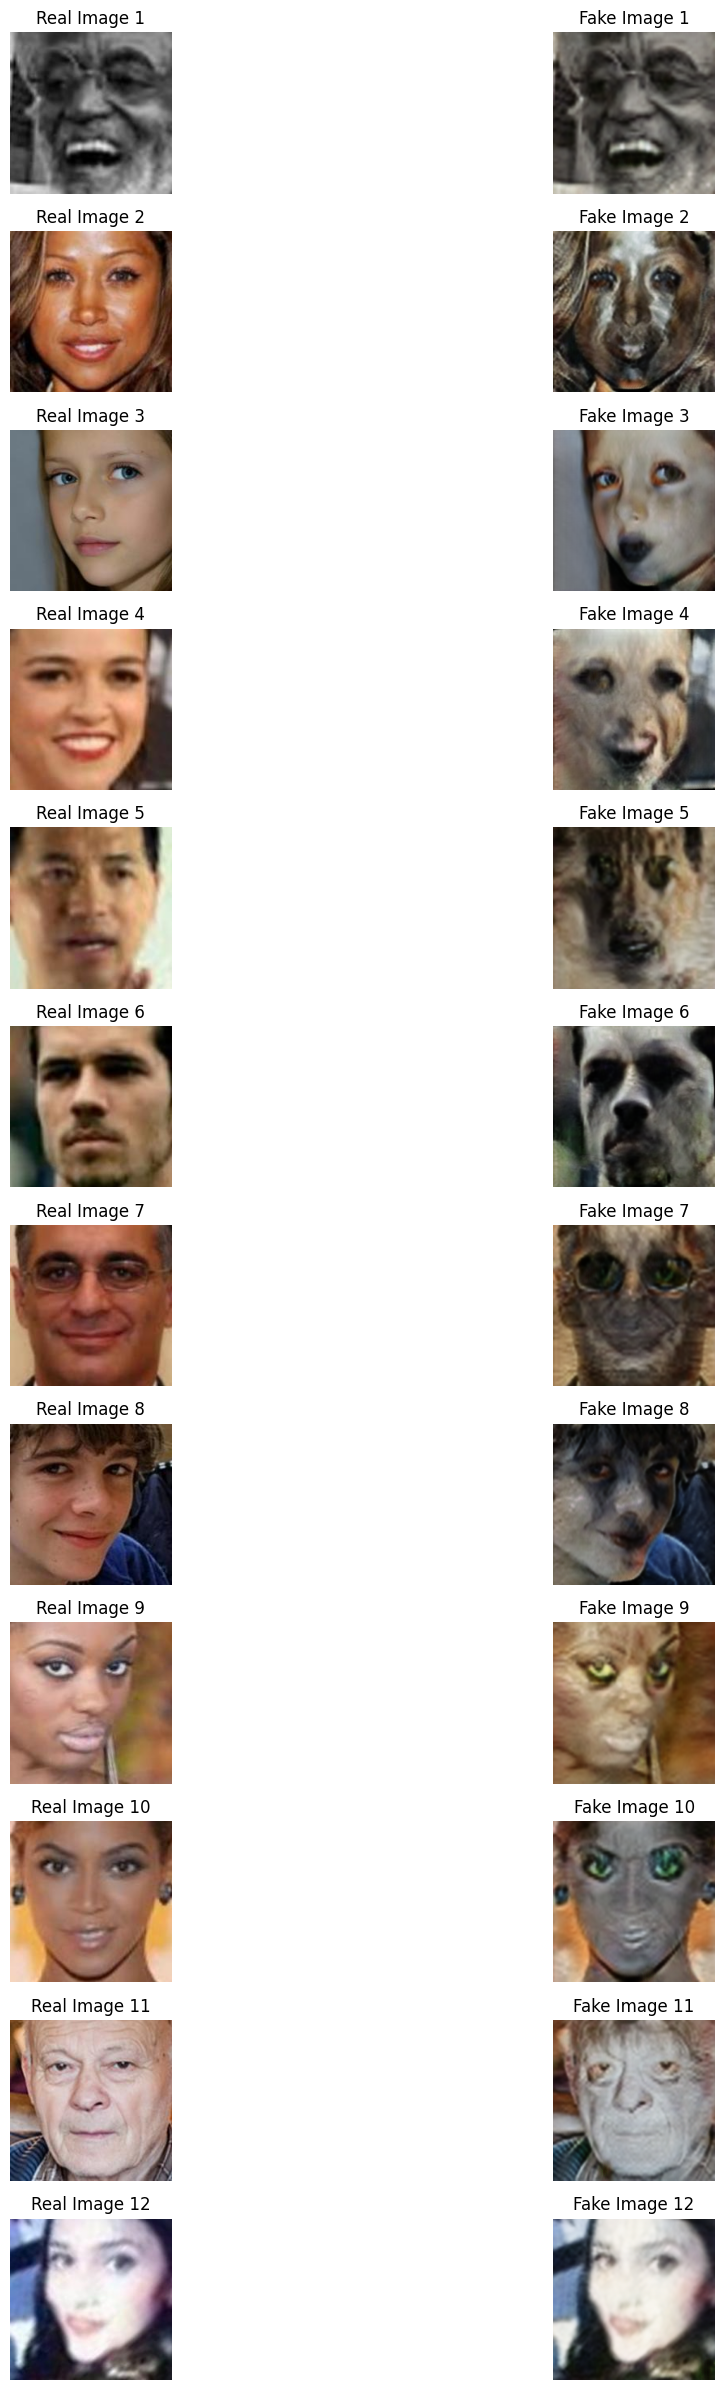

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import math

# Define the paths to the real and fake images
real_images_dir = "/content/drive/MyDrive/CycleGAN_Dataset/testA"  # Directory with real images (humans)
fake_images_dir = "/content/drive/MyDrive/CycleGAN_results/human2animal/test_latest/images"  # Directory with translated images

# Get list of real images (humans)
real_image_files = sorted([f for f in os.listdir(real_images_dir) if f.endswith(".png") or f.endswith(".jpg")])

# Get list of translated images (fake animals)
fake_image_files = sorted([f for f in os.listdir(fake_images_dir) if "fake_B" in f and (f.endswith(".png") or f.endswith(".jpg"))])

# Set number of images to display (must be same for real and fake)
num_images = min(len(real_image_files), len(fake_image_files), 12)  # Change this value to display more images

# Create figure for side-by-side comparison
plt.figure(figsize=(15, num_images * 2))

for i in range(num_images):
    # Load and process real images (humans)
    real_img_path = os.path.join(real_images_dir, real_image_files[i])
    real_img = cv2.imread(real_img_path)
    real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)

    # Load and process fake images (translated to animals)
    fake_img_path = os.path.join(fake_images_dir, fake_image_files[i])
    fake_img = cv2.imread(fake_img_path)
    fake_img = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)

    # Plot real image
    plt.subplot(num_images, 2, i * 2 + 1)
    plt.imshow(real_img)
    plt.axis("off")
    plt.title(f"Real Image {i + 1}")

    # Plot fake image
    plt.subplot(num_images, 2, i * 2 + 2)
    plt.imshow(fake_img)
    plt.axis("off")
    plt.title(f"Fake Image {i + 1}")

plt.tight_layout()
plt.show()


## **Function for other pictures using my trained model**

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone the CycleGAN repository
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 s

In [ ]:
import sys
sys.path.append('/content/pytorch-CycleGAN-and-pix2pix')
from models.networks import define_G

## **Plotting the converted image**

initialize network with normal


<ipython-input-5-ecac98def05b>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(generator_path, map_location=device))


Loaded model: /content/drive/MyDrive/CycleGAN_checkpoints/human2animal/latest_net_G_A.pth
Generated image saved successfully at /content/drive/MyDrive/generated_image2.jpg


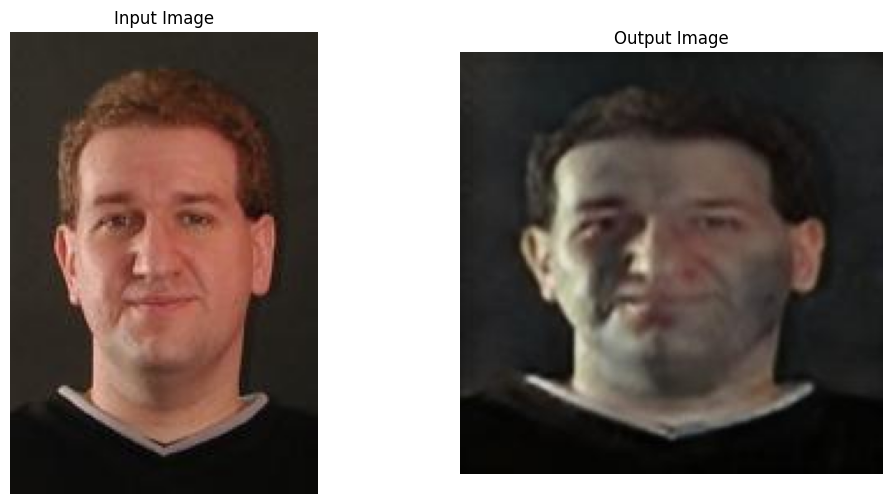

In [ ]:
import sys
import torch
from torchvision import transforms
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Select translation direction (Human to Animal) or (Animal to Human)
direction = "A2B"  # Change to "B2A" if testing Animal to Human

# Paths to generator model checkpoints
if direction == "A2B":
    generator_path = "/content/drive/MyDrive/CycleGAN_checkpoints/human2animal/latest_net_G_A.pth"
elif direction == "B2A":
    generator_path = "/content/drive/MyDrive/CycleGAN_checkpoints/human2animal/latest_net_G_B.pth"
else:
    raise ValueError("Invalid direction! Choose 'A2B' or 'B2A'.")

# Define and load the generator model
model = define_G(input_nc=3, output_nc=3, ngf=64, netG="resnet_9blocks", norm="instance")
model.load_state_dict(torch.load(generator_path, map_location=device))
model.to(device)
model.eval()  # Set to evaluation mode

print(f"Loaded model: {generator_path}")

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match training input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize as in training
])

# Function to preprocess input image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Path to test image
input_image_path = "/content/drive/MyDrive/test_image_t1.jpg"  # input

# Load and preprocess image
input_image = load_image(input_image_path)

# Generate translated image
with torch.no_grad():
    output_image = model(input_image)

# Convert output tensor to image (properly denormalizing)
output_image = output_image.squeeze(0).cpu().detach()
output_image = output_image * 0.5 + 0.5  # Reverse normalization from [-1,1] to [0,1]
output_image = transforms.ToPILImage()(output_image.clamp(0, 1))  # Clamp values to avoid distortions

# Save and display output image
output_image_path = "/content/drive/MyDrive/generated_image2.jpg"
output_image.save(output_image_path)
output_image.show()

print(f"Generated image saved successfully at {output_image_path}")

# Function to display input and output images side by side
def plot_images(input_path, output_path):
    # Load images
    input_img = cv2.imread(input_path)
    output_img = cv2.imread(output_path)

    # Convert BGR (OpenCV format) to RGB
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

    # Plot images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    plt.imshow(output_img)
    plt.axis('off')

    plt.show()

# Display the images
plot_images(input_image_path, output_image_path)


**NOTE:**  Since the Data_Set provided was very huge and had very less computing units along with time a constraint, I have not choosen the entire data provided for my training and testing and have considered a limited data.

In this task, the code I have used makes it necessary for you to provide the folder names inside the .zip file from where you can divide the dataset accordingly which is not always feasible for large computings. Hence I have tried and tested a different code which itertates through different nested folders in the .zip file and gives the desired data cleaning into folders as trainA, trainB, testA & testB. Due to time and computing unit constrain I havent implemented in this Task but I have given the code below which can be used in future for such cases:



```
import os
import shutil
import random

# Set your root dataset paths
root_cat_dog = r"C:\Users\prana\Documents\NEWCASTLE UNIVERSITY\DEEP LEARNING\Project\Data\cat_and_dog-1"  # Change if needed
root_face = r"C:\Users\prana\Documents\NEWCASTLE UNIVERSITY\DEEP LEARNING\Project\Data\face_img"           # Change if needed
output_dir = "Human2CatDog"  # Output folder for structured dataset

# Define train-test split ratio
train_ratio = 0.8  

# Define paths for new dataset structure
trainA_path = os.path.join(output_dir, "trainA")
trainB_path = os.path.join(output_dir, "trainB")
testA_path = os.path.join(output_dir, "testA")
testB_path = os.path.join(output_dir, "testB")

# Create output directories
for path in [trainA_path, trainB_path, testA_path, testB_path]:
    os.makedirs(path, exist_ok=True)

def get_all_images(folder_path):
    """Recursively collects all image file paths in a folder."""
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files

def split_and_copy(image_paths, dest_train, dest_test, train_ratio=0.8):
    """Splits images into train and test, then copies them to respective folders."""
    random.shuffle(image_paths)  # Shuffle data

    split_idx = int(len(image_paths) * train_ratio)
    train_files, test_files = image_paths[:split_idx], image_paths[split_idx:]

    for file in train_files:
        shutil.copy(file, os.path.join(dest_train, os.path.basename(file)))

    for file in test_files:
        shutil.copy(file, os.path.join(dest_test, os.path.basename(file)))

# Process all images in cat_and_dog-1 (for domain B - cats & dogs)
all_cat_dog_images = get_all_images(root_cat_dog)
split_and_copy(all_cat_dog_images, trainB_path, testB_path)

# Process all images in face_img (for domain A - human faces)
all_face_images = get_all_images(root_face)
split_and_copy(all_face_images, trainA_path, testA_path)

print("Data preparation complete! Check the 'Human2CatDog' folder.")
```



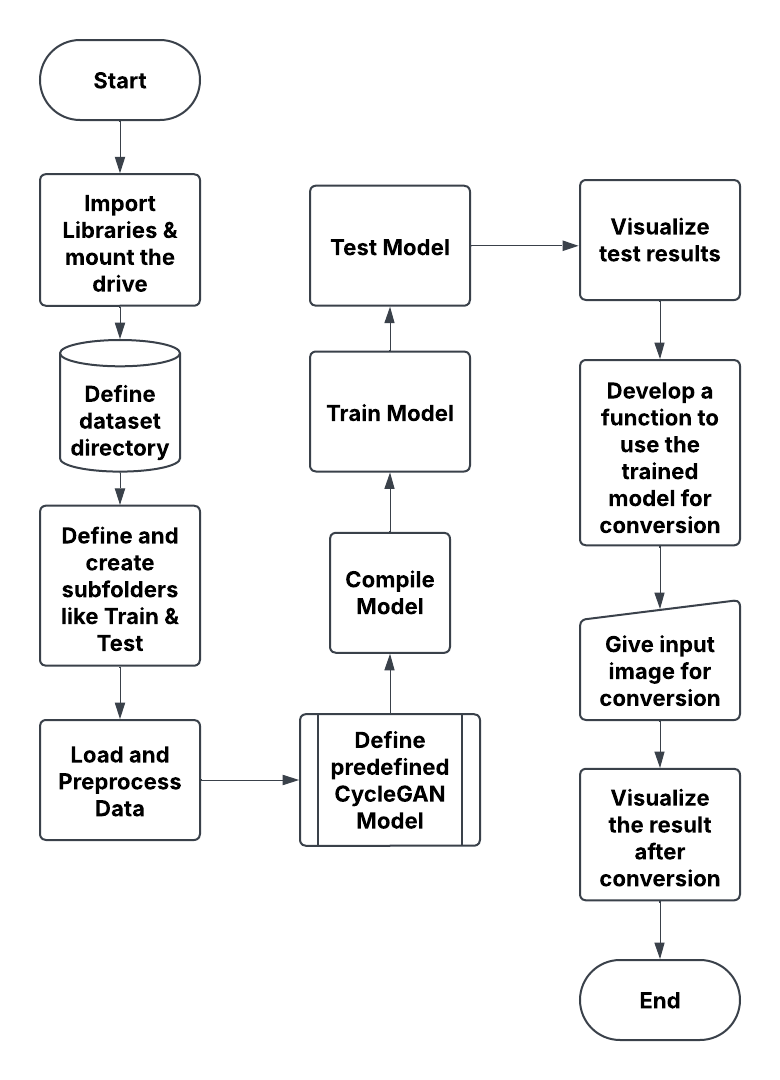

## **REPORT**



*  Linked Google Drive for reliable data storage.

*  Organized project files into "CycleGAN_Dataset" folder with key subfolders.

* Automated extraction from nested ZIP archives with error-handling.

* Extracted images were stored temporarily in `/content/temp_extracted`

* Employed `move_images` function to transfer and rename images using "human" and "animal" prefixes.

* Populated `trainA` (humans) and `trainB` (animals).

* Split data into training (80%) and testing (20%) sets, shuffling for randomness.

* Created directories `testA`, and `testB`, and moved the test images to those respective directories.

* Cloned the “PyTorch CycleGAN” GitHub repository.


* Installed all dependencies using `pip install -r requirements.txt`


* Trained the CycleGAN model using the prepared dataset.


* Saved the trained model to Google Drive for future use.


* Loaded the saved model and performed face conversions using a custom function written.


* Verified the model's ability to translate human faces into animal-like representations.



## Potential Problems and Mitigation Strategies in CycleGAN Training

| Potential Problem | How to Mitigate |
|------------------|----------------|
| The model collapses and only produces a small number of “weird” images. | Use a lower learning rate to stabilize training. Apply instance normalization to improve convergence. Additionally, we can use a buffer of previously generated images for the discriminator to prevent it from overfitting to the most recent outputs of the generator. This can be done by maintaining a pool of generated images and randomly sampling from this pool during training. |
| Mode collapse where the generator produces limited variety of images | Maintaining a history of generated images for the discriminator to use, which can help in providing more diverse feedback. Applying one sided label smoothing to make the discriminator less confident and encourage the generator to produce a wider variety of images. Ensuring the training dataset is diverse to provide a broad range of data for the model to learn from. This can also be achieved by augmenting the dataset with various transformations such as rotations, flips, and colour adjustments. |
| Training instability and oscillations | Implementing a learning rate decay schedule to gradually reduce the learning rate during training, which can help in stabilizing the training process. Applying gradient clipping to prevent the gradients from exploding. Use of a stable optimizer like Adam with carefully chosen hyperparameters to maintain consistent updates. |
| Overfitting to the training data | Applying data augmentation techniques such as random cropping, flipping, and rotation to increase the variability of the training data. Using dropout in the generator and discriminator networks to prevent overfitting by randomly dropping units during training. This can be implemented by adding data augmentation steps and using dropout layers in the network architectures. |
| Imbalanced training of generator and discriminator. | Adjusting the training frequency of the generator and discriminator to ensure they are trained in a balanced manner. Usage of techniques like Wasserstein loss with gradient penalty to provide more stable and balanced updates to both networks. |
| Slow convergence and long training times. | Using a pre-trained model to initialize the weights of the generator and discriminator, which can speed up convergence. Additionally, we can use mixed precision training to reduce memory usage and increase training speed. |
| Inconsistent colour and texture in generated images. | Using a perceptual loss based on a pretrained network like VGG to ensure that the generated images have consistent colour and texture. This can help the model produce more realistic and visually appealing images. This can be used by adding a perceptual loss term to the objective function, which measures the similarity between the generated and real images in the feature space of a pre-trained network. |
| Difficulty in learning identity mapping | Adding an identity loss term to the objective function to ensure that the generator preserves the identity of images when the input and output domains are the same. This helps the model learn to map images more accurately between domains. The identity loss can be calculated by passing images from domain A through the generator for domain B and vice versa, and ensuring that the output is similar to the input. |


### **References**
*  Used Lucid Chart for Development of flowchart.
*  Generative AI for better English and presentation.
*  CycleGAN types and usage examples from the internet.